# CSCA5632 Unsupervised Learning Final Project - Student Performance Prediction

## Introduction

In this project, I will use unsupervised learning techniques to predict students' exam performance. The main goal is to explore various models and approaches to effectively analyze and predict exam outcomes based on the available dataset. This involves focusing on model building, training, and evaluation, with a particular emphasis on tailoring the methods to suit the unique characteristics of the data.

## Data Overview

The dataset is available at https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data. It was not collected from real-world examples, such as experiments conducted with university students, but instead was randomly generated by the author for educational purposes.

### Import Libraries

In [18]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

### Data Import

In [19]:
data = pd.read_csv('./data/StudentPerformanceFactors.csv')

### Inital Look

In [20]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [22]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Datasent contains 20 columns and 6607 rows. The types of data are divided into number and categorical. With 3 columns containing small number of NaN, the data is relatively clean.

## Exploratory Data Analysis(EDA) - Inspect, Visualize, and Clean the Data

First, let's remove the rows with NaN values from the data. There are three columns containing NaN values, each accounting for less than 1% of the total data, so dropping these rows is a reasonable approach.

In [23]:
data = data.dropna()
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Now the data is clean, let's divide the data into numerical and categorical then visualize them.

In [24]:
numeric_columns = data.select_dtypes(include=['number'])
categorical_columns = data.select_dtypes(include=['object'])

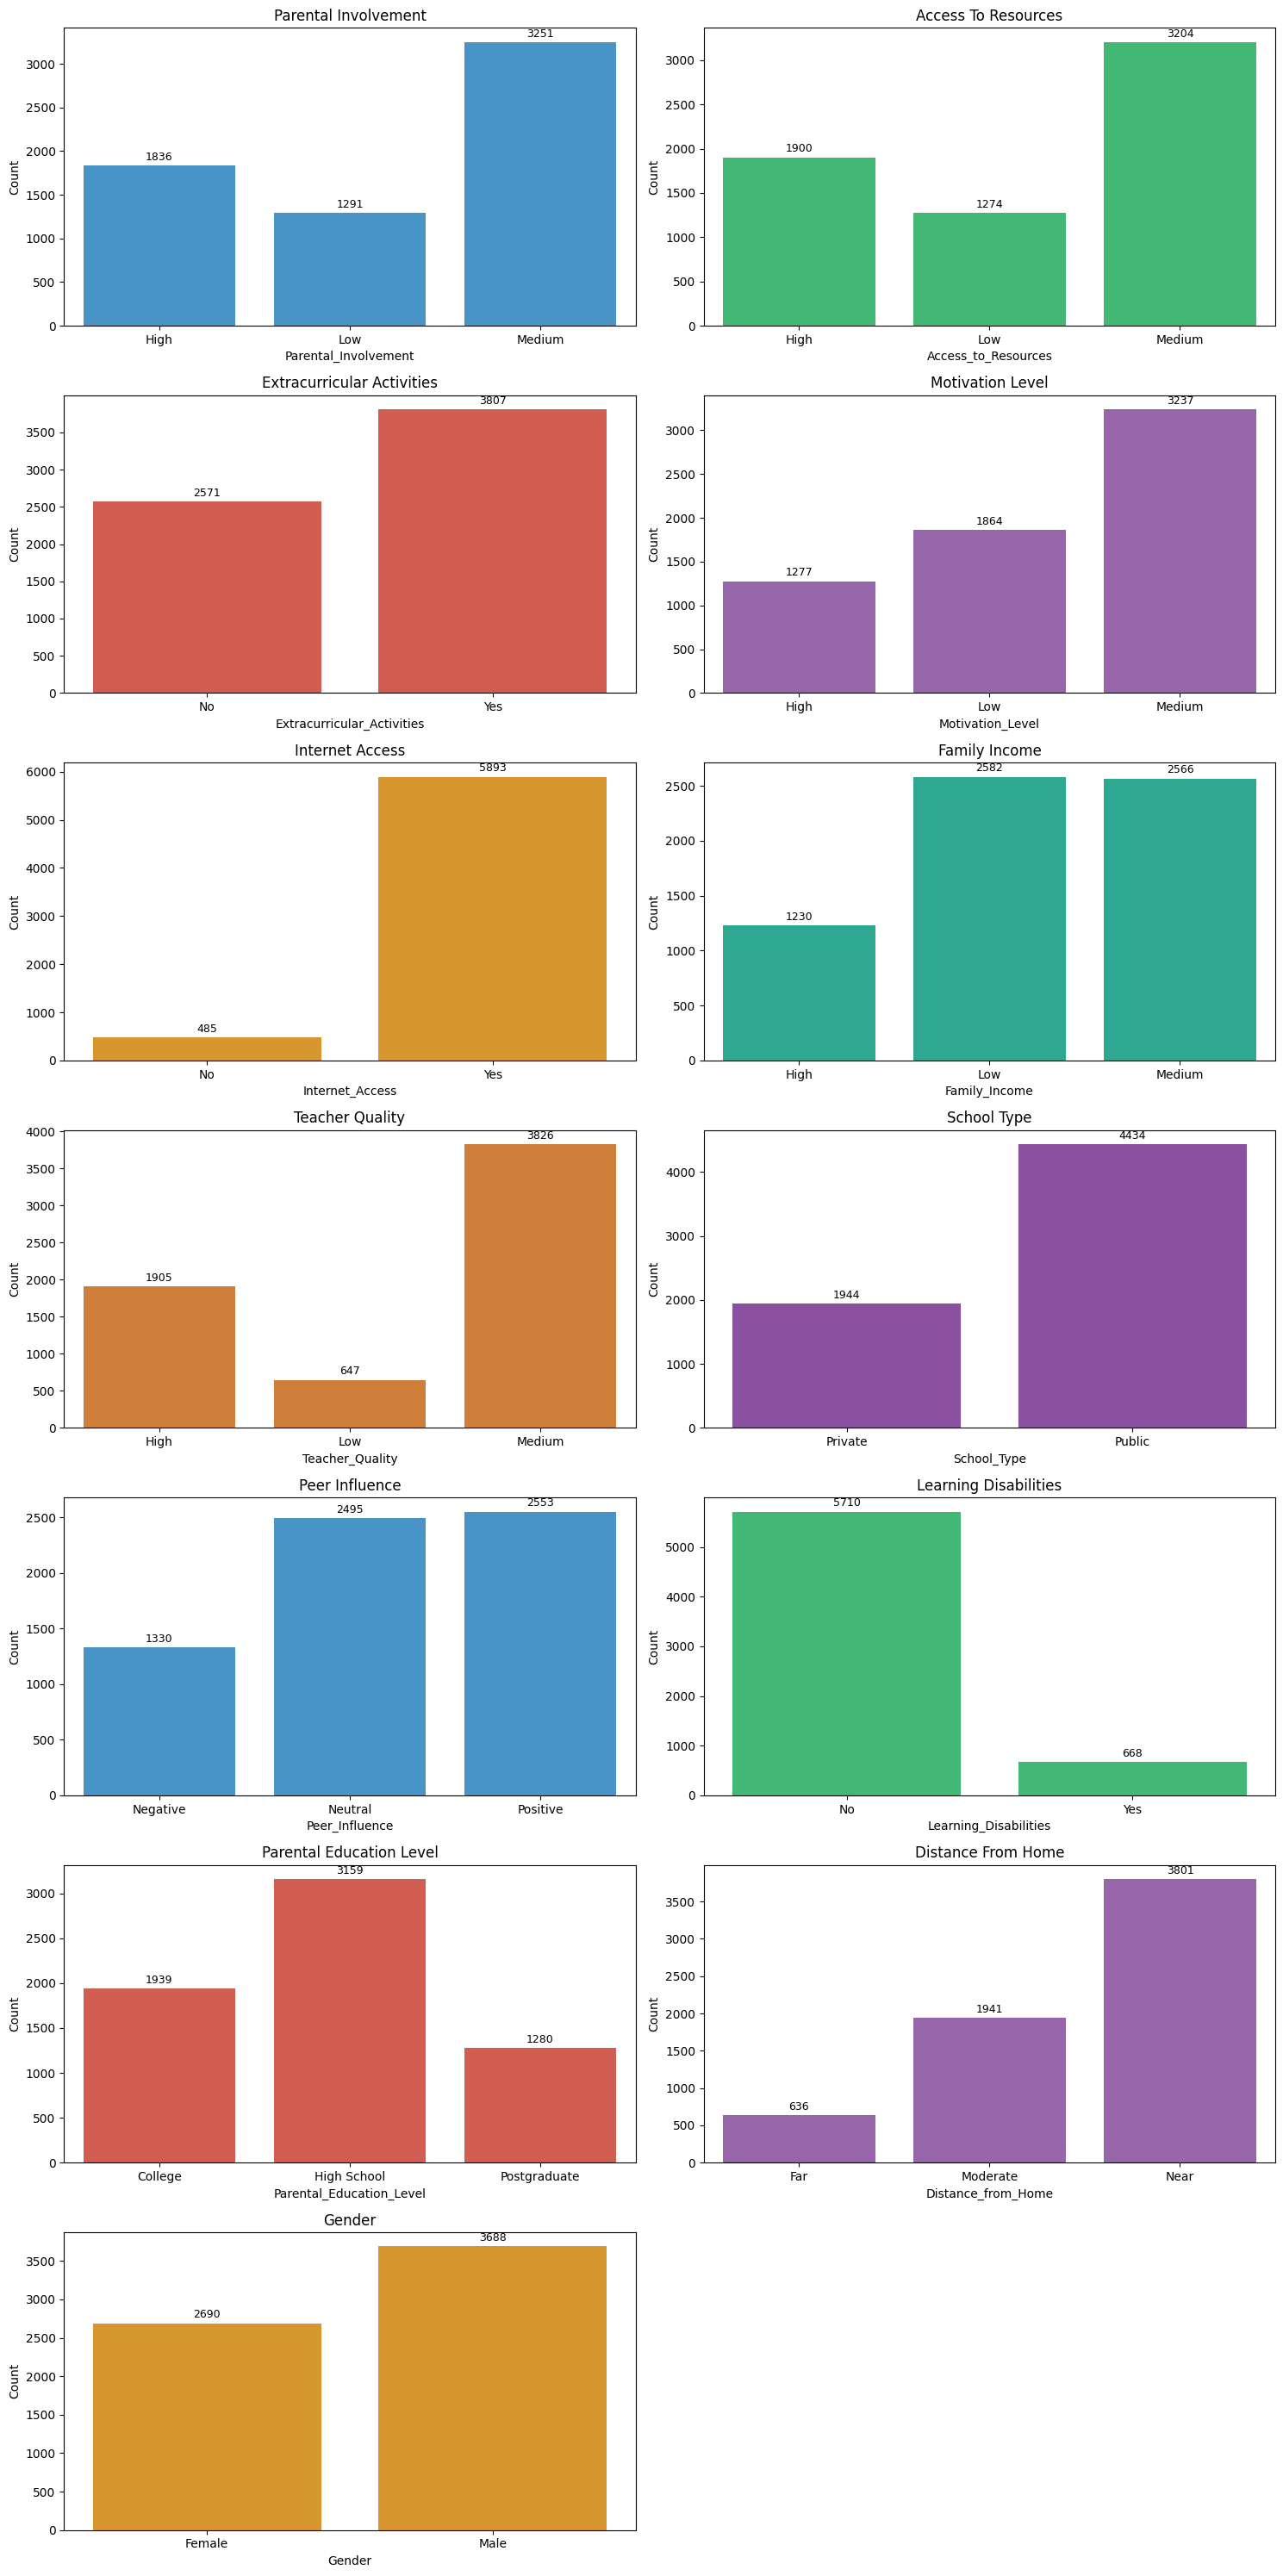

In [25]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(categorical_columns.columns):
    counts = data[column].value_counts().sort_index()
    plt.subplot((len(categorical_columns.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

These bar graphs help me visualize and understand the data easily. One thing that stands out about this categorical dataset is that there is about 30% more male than female. 

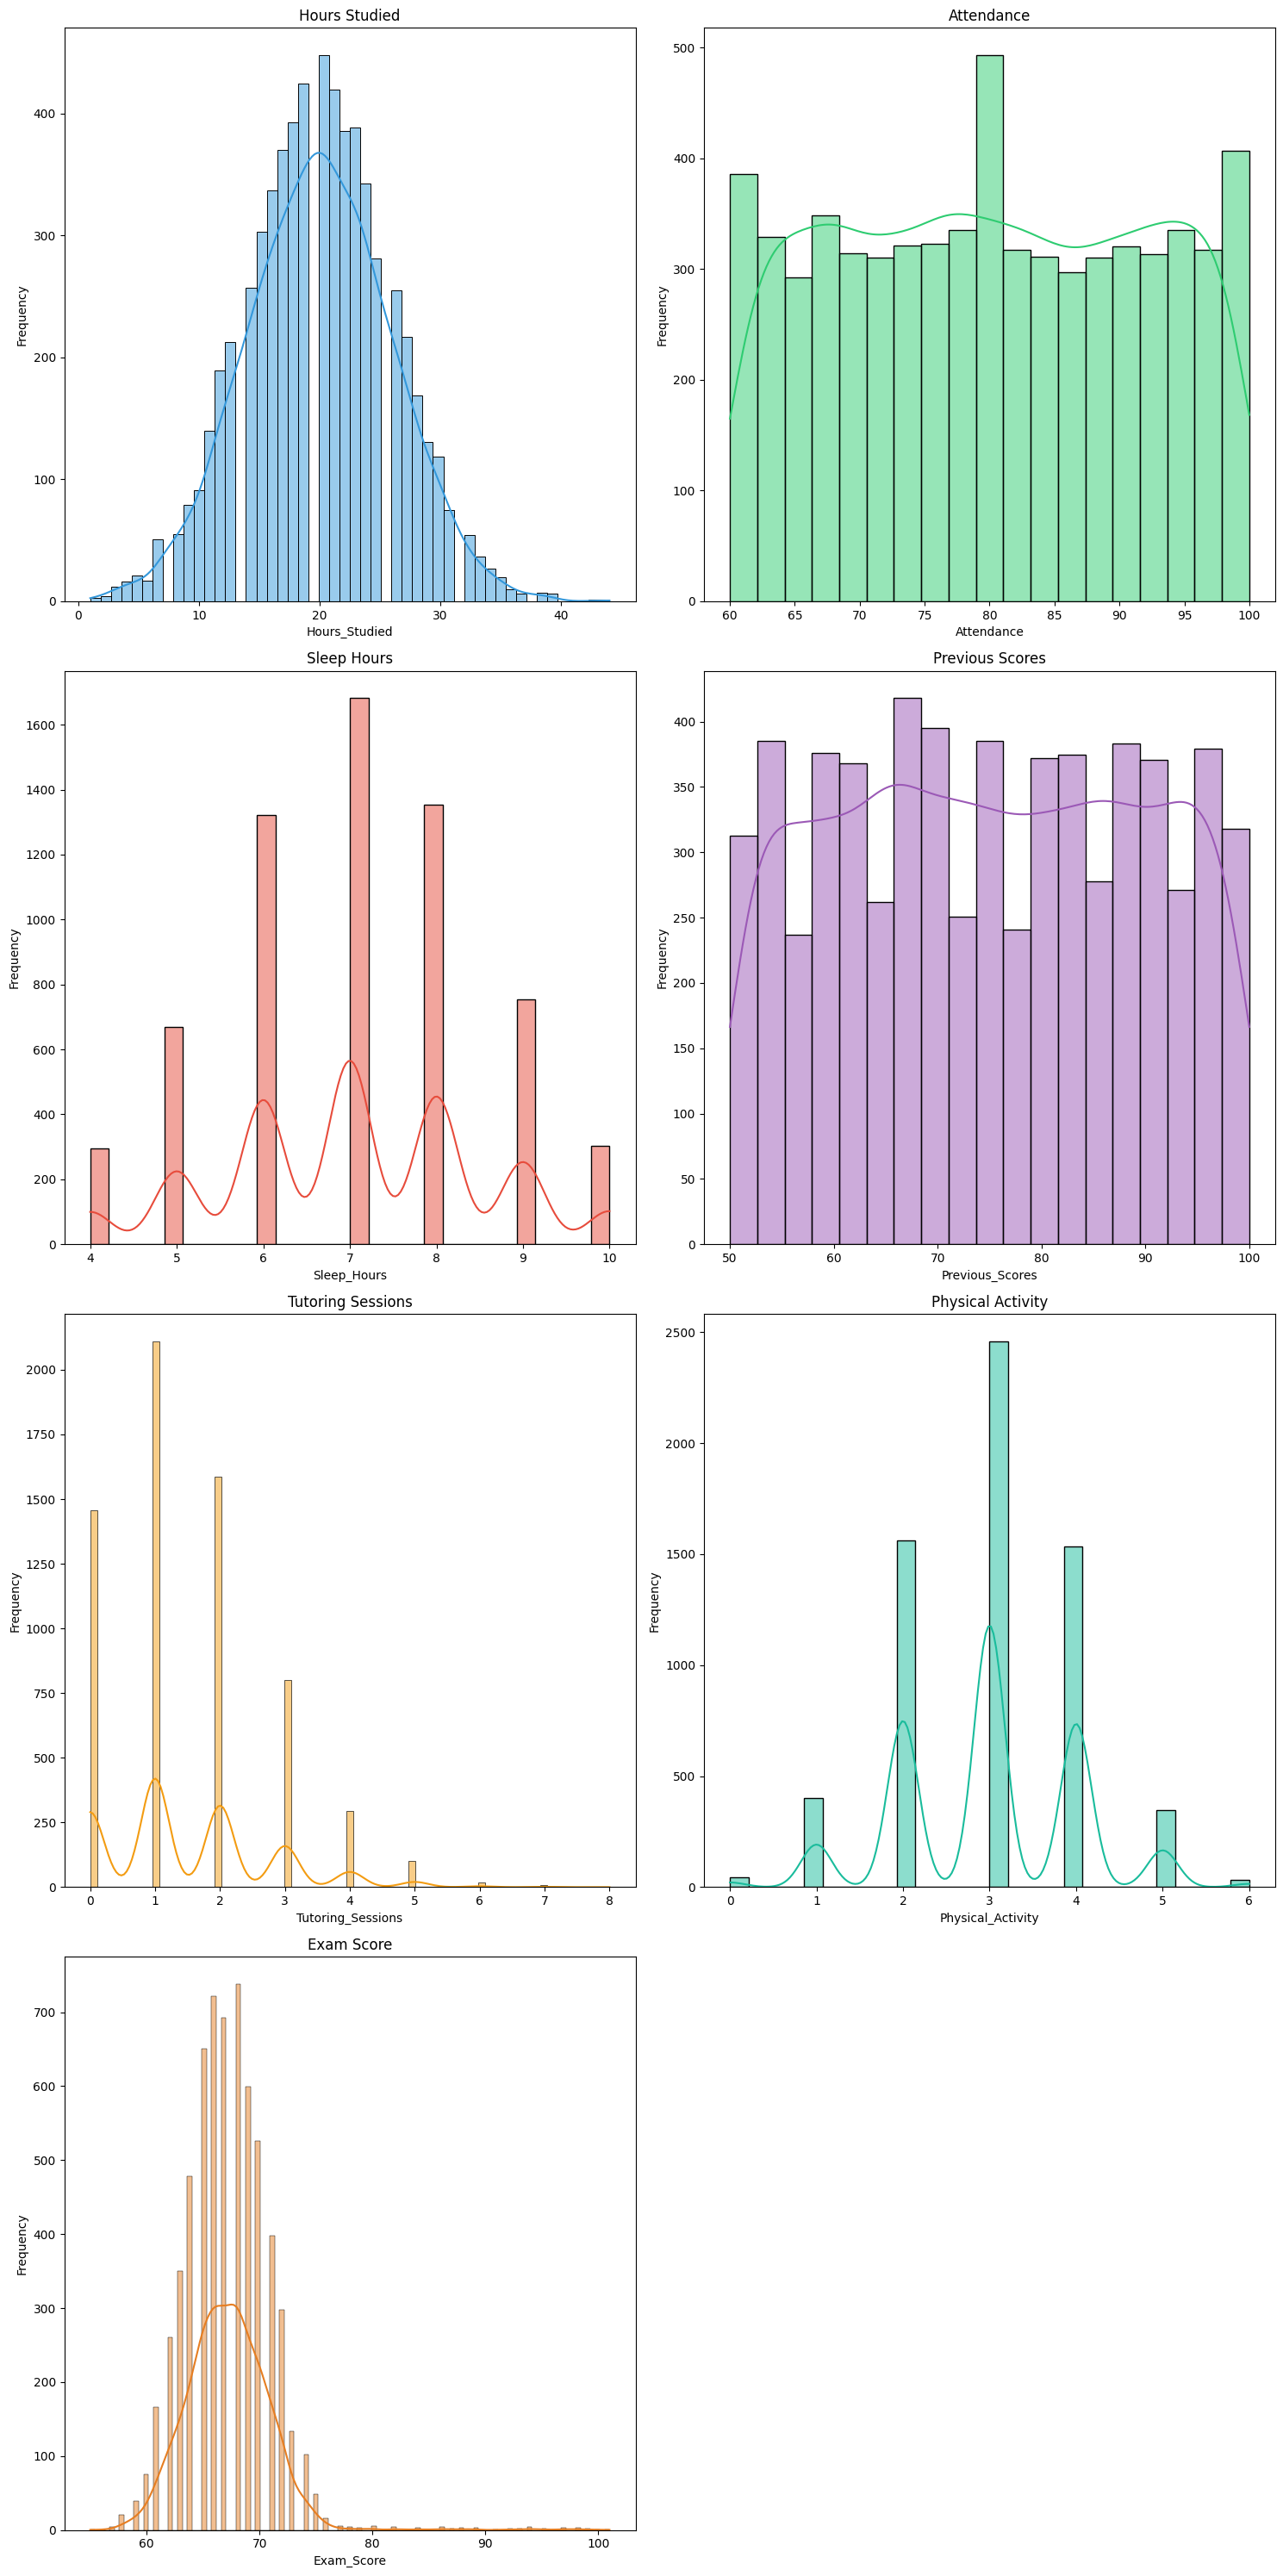

In [26]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each numeric column
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    sns.histplot(numeric_columns[column], kde=True, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Since we are on numerical data, let's run heatmap to checkout the relationship between each columns.

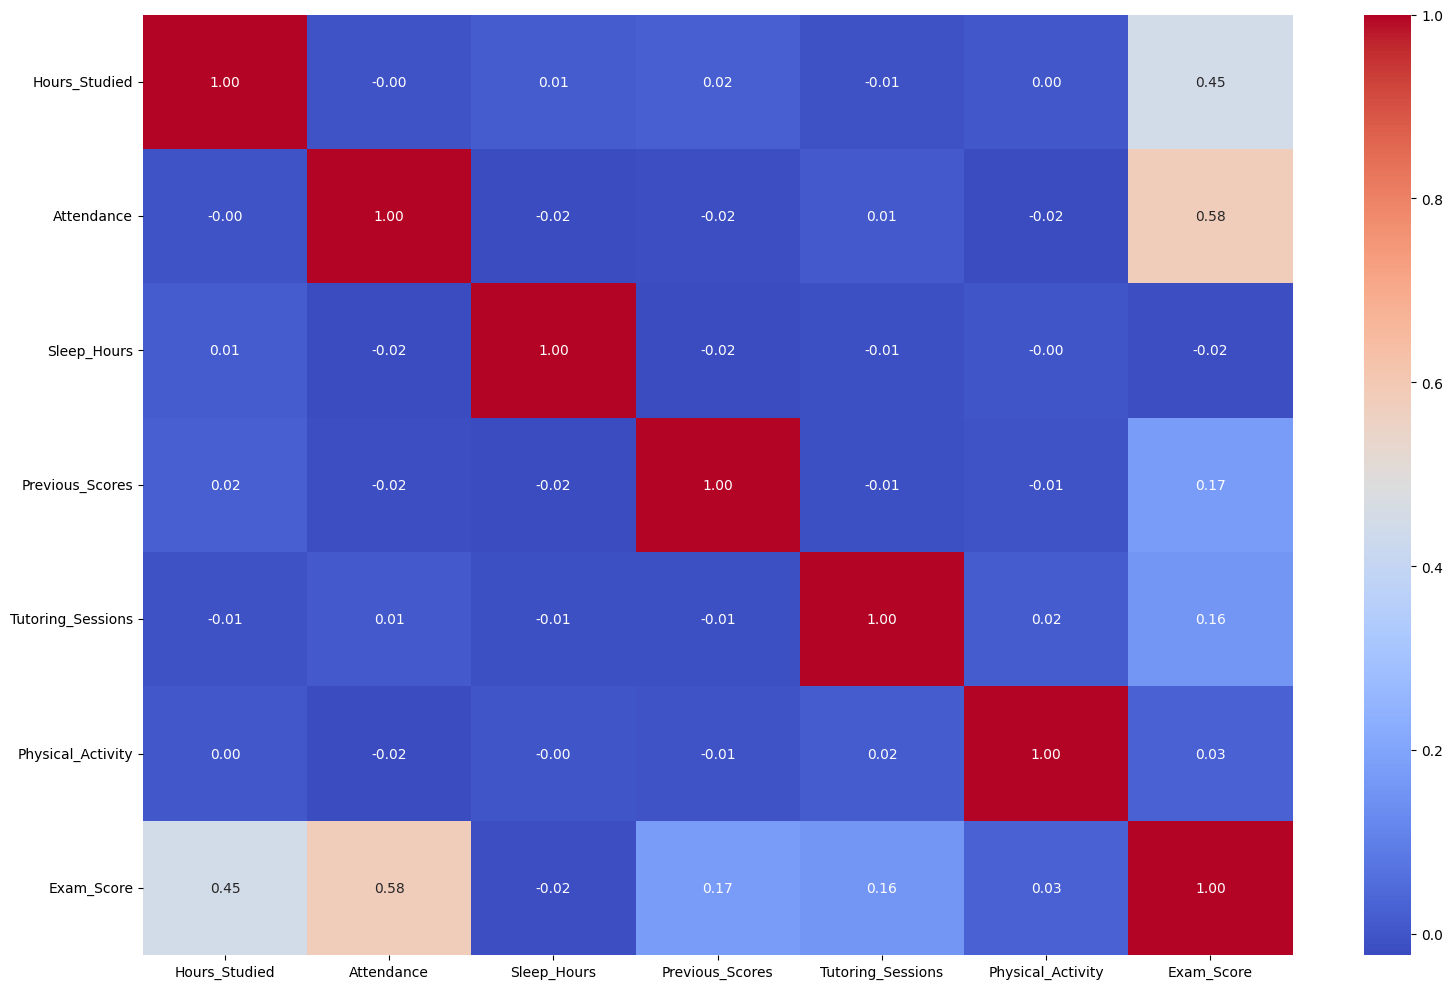

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

From the heatmap above, we can see that `Exam_Score` and `Attendance` have strong correlation with score of 0.58. Second strongest correlation goes to `Exam_Score` and `Hours_Studied` with 0.45.
From my experience, it makes sense that the more time students spend studying, the higher their exam scores tend to be. Let's zoom into the relationship between `Exam_Score` and `Hours_Studied`.

<Figure size 800x800 with 0 Axes>

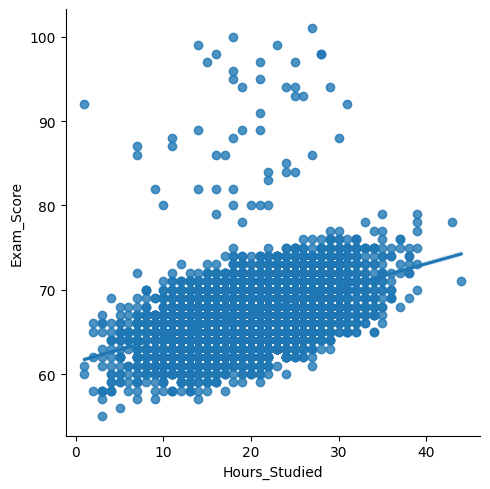

In [28]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.show()

It's interesting to note that those students that studied between 20 to 30 hours had the highest exam score, but not those that spent over 40 hours of study.

## Perform Analysis Using Unsupervised Learning Models